# Install packages
List of packages that work for the code
*   https://github.com/saeed-anwar/DRLN/issues/12



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip uninstall --y torchvision
!pip uninstall --y torch
!pip uninstall --y scipy
!pip install -q torch==1.1.0 torchvision==0.3.0
!pip install scipy==1.1.0 # https://github.com/saeed-anwar/DRLN/issues/11

Uninstalling torchvision-0.9.1+cu101:
  Successfully uninstalled torchvision-0.9.1+cu101
Uninstalling torch-1.8.1+cu101:
  Successfully uninstalled torch-1.8.1+cu101
Uninstalling scipy-1.4.1:
  Successfully uninstalled scipy-1.4.1
     |████████████████████████████████| 676.9MB 25kB/s 
     |████████████████████████████████| 2.6MB 54.1MB/s 
ERROR: fastai 1.0.61 requires scipy, which is not installed.
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.1.0 which is incompatible.
     |████████████████████████████████| 31.2MB 1.3MB/s 
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [ ]:
import torch
print(torch.__version__)

1.1.0


# Download code

In [ ]:
!git clone https://github.com/Luxi-Zhao/SingleImageSuperResolution.git

Cloning into 'SingleImageSuperResolution'...
remote: Enumerating objects: 1043, done.
remote: Counting objects: 100% (1043/1043), done.
remote: Compressing objects: 100% (766/766), done.
remote: Total 1043 (delta 343), reused 936 (delta 236), pack-reused 0
Receiving objects: 100% (1043/1043), 99.46 MiB | 24.49 MiB/s, done.
Resolving deltas: 100% (343/343), done.


## Download Models

In [ ]:
cd /content/drive/MyDrive/2516

/content/drive/MyDrive/2516


In [ ]:
GDRIVE = '/content/drive/MyDrive/2516'
CODE_DIR = '/content/SingleImageSuperResolution/TestCode'

In [ ]:
models = [
          'RDN_50epoch_Baseline_Bicubic',
          'RDN_50epoch_AblateCMLRLGFF_Bicubic',
          'RDN_50epoch_AblateLRLGFF_Bicubic',
          'RDN_50epoch_AblateCMGFF_Bicubic',
          'RDN_50epoch_AblateCMLRL_Bicubic',
          'RDN_50epoch_AblateGFF_Bicubic',
          'RDN_50epoch_AblateLRL_Bicubic',
          'RDN_50epoch_AblateCM_Bicubic',
          'RDN_50epoch_ShortSkipConn_Bicubic',
          'RDN_50epoch_Laplacian_Bicubic',
          'RDN_50epoch_ResidualBlock_Bicubic',
          'RDN_50epoch_CascadingBlock_Bicubic'
         ]

In [ ]:
cd /content

/content


In [ ]:
for model in models:
  print(model)
  !cp {GDRIVE}/{model}.zip /content/
  !unzip -q {model}.zip

RDN_50epoch_Baseline_Bicubic
RDN_50epoch_AblateCMLRLGFF_Bicubic
RDN_50epoch_AblateLRLGFF_Bicubic
RDN_50epoch_AblateCMGFF_Bicubic
RDN_50epoch_AblateCMLRL_Bicubic
RDN_50epoch_AblateGFF_Bicubic
RDN_50epoch_AblateLRL_Bicubic
RDN_50epoch_AblateCM_Bicubic
RDN_50epoch_ShortSkipConn_Bicubic
RDN_50epoch_Laplacian_Bicubic
RDN_50epoch_ResidualBlock_Bicubic
RDN_50epoch_CascadingBlock_Bicubic


## Test Ablations

In [ ]:
cd {CODE_DIR}/code

/content/SingleImageSuperResolution/TestCode/code


In [ ]:
test_sets = ['Set5', 'Set14', 'Urban100', 'BSD100']
model_branch = {
          'RDN_50epoch_AblateCMLRLGFF_Bicubic': 'rdn-ablate-cm-lrl-gff',
          'RDN_50epoch_AblateLRLGFF_Bicubic': 'rdn-ablate-lrl-gff',
          'RDN_50epoch_AblateCMGFF_Bicubic': 'rdn-ablate-cm-gff',
          'RDN_50epoch_AblateCMLRL_Bicubic': 'rdn-ablate-cm-lrl',
          'RDN_50epoch_AblateGFF_Bicubic': 'rdn-ablate-gff',
          'RDN_50epoch_AblateLRL_Bicubic': 'rdn-ablate-lrl',
          'RDN_50epoch_AblateCM_Bicubic': 'rdn-ablate-cm',
          'RDN_50epoch_Baseline_Bicubic': 'master',
          'RDN_50epoch_ShortSkipConn_Bicubic': 'rdn-shortskipconn',
          'RDN_50epoch_Laplacian_Bicubic': 'rdn-laplacian',
          'RDN_50epoch_ResidualBlock_Bicubic': 'rdn-residual-block',
          'RDN_50epoch_CascadingBlock_Bicubic': 'rdn-cascading-block',
}

In [ ]:
for test_set in test_sets:
  print('*********** Test Set: {} ***********'.format(test_set))
  for experiment_name in models:
    print('----- Experiment: {} -----'.format(experiment_name))
    !git checkout {model_branch[experiment_name]}
    !git pull > /dev/null    
    !python main.py --data_test MyImage --scale 2 --RDNconfig C --model RDN --n_feats 64 --pre_train /content/{experiment_name}/model/model_best.pt --test_only --save_results --chop --save {experiment_name}Test_{test_set} --testpath ../LR/LRBI --testset {test_set}

*********** Test Set: Set5 ***********
----- Experiment: RDN_50epoch_Baseline_Bicubic -----
Already on 'master'
Your branch is up to date with 'origin/master'.
remote: Enumerating objects: 171, done.
remote: Counting objects: 100% (159/159), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 111 (delta 92), reused 79 (delta 61), pack-reused 0
Receiving objects: 100% (111/111), 10.03 KiB | 10.03 MiB/s, done.
Resolving deltas: 100% (92/92), completed with 29 local objects.
From https://github.com/Luxi-Zhao/SingleImageSuperResolution
   bb8d0ca..472be93  rdn-ablate-cm       -> origin/rdn-ablate-cm
   05c47e9..4476d06  rdn-ablate-cm-gff   -> origin/rdn-ablate-cm-gff
   d638c67..42f75ef  rdn-ablate-cm-lrl   -> origin/rdn-ablate-cm-lrl
   bb1d181..1aa86ae  rdn-ablate-gff      -> origin/rdn-ablate-gff
   41cfc02..7d78225  rdn-ablate-lrl      -> origin/rdn-ablate-lrl
   42d4cdd..6779b20  rdn-ablate-lrl-gff  -> origin/rdn-ablate-lrl-gff
   95d1207..9d2209a  rdn-cascading-block

# Process Test Logs

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
'''
Set 5: {
    RDN_50epoch_Baseline_Bicubic: {
        PSNR: xx
        SSIM: xx
    }
}
'''
f = open("log.txt", "r")
lines = f.readlines()
results = {}

test_name = None
experiment_name = None
for line in lines:
    if line.startswith('*'):
        test_name = line.split(':')[1].split()[0]
        results[test_name] = {}
    if line.startswith('-'):
        experiment_name = line.split(':')[1].split()[0]
        results[test_name][experiment_name] = {}
    if line.startswith('['):
        if line.find('PSNR') != -1:
            psnr = float(line.split('\t')[1].split()[1])
            results[test_name][experiment_name]['PSNR'] = psnr
        if line.find('SSIM') != -1:
            ssim = float(line.split('\t')[1].split()[1])
            results[test_name][experiment_name]['SSIM'] = ssim


import json
print(json.dumps(results, sort_keys=False, indent=4))

In [ ]:
def process_exp_names(exp_names):
  new_names = []
  for name in exp_names:
    arr = name.split('_')
    exp = arr[2]
    new_names.append(exp)
  return new_names

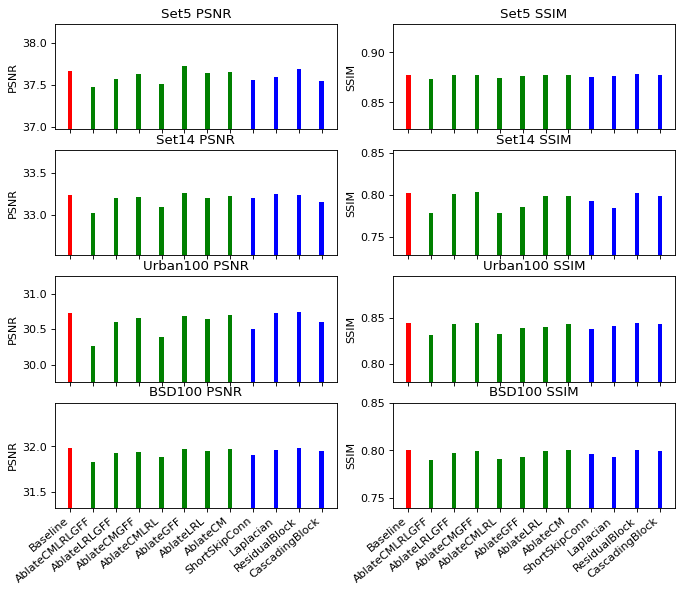

In [ ]:
fig, axs = plt.subplots(len(results.keys()), 2, figsize=(10, 8), dpi=80, sharex=True)

val_types = ['PSNR', 'SSIM']
for i, test_name in enumerate(results):
  for j, val_type in enumerate(val_types):
    experiments = results[test_name]

    offset = 0.5 if j == 0 else 0.05
    colors = []   
    for exp_name in experiments.keys():
      if exp_name.find('Baseline') != -1:
        colors.append('r')
      elif exp_name.find('Ablate') != -1:
        colors.append('g')
      else:
        colors.append('b')

    experiment_names = process_exp_names(experiments.keys())
    psnrs = [exp[val_type] for exp in experiments.values()]

    axs[i, j].set_title(test_name + ' ' + val_type)
    axs[i, j].bar(experiment_names, psnrs, width=0.2, color=colors)
    axs[i, j].set_ylim([min(psnrs)-offset, max(psnrs)+offset])
    axs[i, j].set(ylabel=val_type)


for ax in axs.flat:
    ax.set_xticklabels(experiment_names, rotation=40, ha='right')
